# Import and Reading Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_path = "/content/drive/MyDrive/Colab Notebooks/nlp-project-3-dataset/test.csv"
train_path = "/content/drive/MyDrive/Colab Notebooks/nlp-project-3-dataset/train.csv"
import nltk
nltk.download('stopwords')
stop_word_list = nltk.corpus.stopwords.words('turkish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Reading Files

In [ ]:
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)

In [ ]:
train_df.head(10)

,Unnamed: 0,id,text,label
0,0,547530,Beşiktaş'ın eski teknik direktörü Slaven Bilic...,spor
1,1,42683,"14 Şubat, Katolik Kilisesi’nin azizlerinden St...",yazarlar
2,2,770925,İstanbul Kağıthane’de gece yarısı sokakta oyun...,video
3,3,473224,Ziraat Türkiye Kupası maçında deplasmanda Amed...,video
4,4,44833,"Eski Brezilyalı yıldız oyuncu Ronaldo, Brezily...",spor
5,5,343736,"\n\n\n \nLideri, anneler gününü Hazreti Muhamm...",yazarlar
6,6,729677,İngiltere'nin Daily Star Gazetesinin son dakik...,spor
7,7,37307,Irak’ın Nineva eyaletinde bir Irak Şam İslam D...,dunya
8,8,278921,Meteoroloji'den son dakika hava durumu tahmini...,turkiye
9,9,554302,Avrupa Futbol Şampiyonası'nda (EURO 2016) gols...,spor


## Dividing data into keys and values

In [ ]:
testx = test_df["text"]
testy = test_df["label"]
trainx = train_df["text"]
trainy = train_df["label"]

In [ ]:
print("train size:",trainx.size)
print("test.size:",testx.size)

train size: 8000
test.size: 2000


# Naïve Bayes

In [ ]:
from sklearn.pipeline import Pipeline
model_pipeline=Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase=True, stop_words=stop_word_list,)),("mnb",MultinomialNB())]) # extracted stopwords and lowercased

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV


grid_params = {
  'mnb__alpha': np.linspace(0.5, 1.5, 3),
  'mnb__fit_prior': [True, False],
  'tfidf_vectorizer__use_idf':[True,False], # include idf or not
  'tfidf_vectorizer__norm': [None, 'l1', 'l2'], # normalization
  'tfidf_vectorizer__binary': [True, False] 
}
clf = GridSearchCV(model_pipeline, grid_params,verbose=10,n_jobs=-1)
clf.fit(trainx, trainy)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

Best Score:  0.789125
Best Params:  {'mnb__alpha': 1.5, 'mnb__fit_prior': True, 'tfidf_vectorizer__binary': True, 'tfidf_vectorizer__norm': None, 'tfidf_vectorizer__use_idf': True}


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(testx)
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

       dunya       0.80      0.85      0.82       395
        spor       0.90      0.93      0.92       384
     turkiye       0.65      0.67      0.66       421
       video       0.74      0.51      0.60       408
    yazarlar       0.80      0.96      0.87       392

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.77      2000



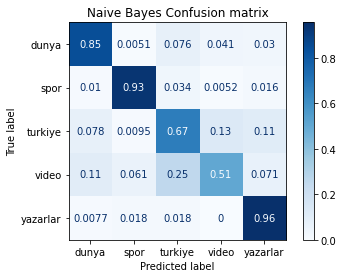

<Figure size 432x288 with 0 Axes>

In [ ]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(testy, y_pred))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

# np.set_printoptions(precision=5)

class_names = ['spor','yazarlar','video','dunya','turkiye']

# Plot non-normalized confusion matrix
titles_options = "Naive Bayes Confusion matrix"
disp = plot_confusion_matrix(clf, testx, testy,
                              # display_labels=class_names,
                              cmap=plt.cm.Blues,normalize="true")
disp.ax_.set_title(titles_options)


plt.show()
plt.clf()

# Logistic Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(lowercase=True, stop_words=stop_word_list)), # extracted stopwords and lowercased
    ('lr', LogisticRegression(max_iter=1000))
])


grid_params = {
  'lr__C': np.logspace(-3,3,3),
  'tfidf_vectorizer__use_idf':[True,False],
  'tfidf_vectorizer__binary': [True, False]
}

clf = GridSearchCV(lr_pipeline, grid_params,verbose=5,n_jobs=-1)
clf.fit(trainx, trainy)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 16.0min finished


Best Score:  0.8564999999999999
Best Params:  {'lr__C': 1000.0, 'tfidf_vectorizer__binary': True, 'tfidf_vectorizer__use_idf': True}


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(testx)
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

       dunya       0.82      0.88      0.85       395
        spor       0.93      0.94      0.94       384
     turkiye       0.82      0.73      0.77       421
       video       0.81      0.80      0.81       408
    yazarlar       0.91      0.96      0.93       392

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



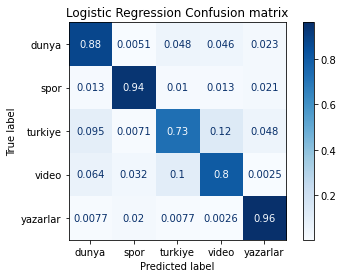

<Figure size 432x288 with 0 Axes>

In [ ]:
class_names = ['spor','yazarlar','video','dunya','turkiye']

# Plot non-normalized confusion matrix
titles_options = "Logistic Regression Confusion matrix"
disp = plot_confusion_matrix(clf, testx, testy,
                              # display_labels=class_names,
                              cmap=plt.cm.Blues,normalize="true")
disp.ax_.set_title(titles_options)


plt.show()
plt.clf()